# Tensor Network Basics

In [2]:
%matplotlib inline
import quimb as qu
import quimb.tensor as qtn

## Creating Tensors

Create singlet state in tensor form.

In [3]:
data = qu.bell_state('psi-').reshape(2, 2)

In [4]:
data

[[ 0.      +0.j  0.707107+0.j]
 [-0.707107+0.j  0.      +0.j]]

In [5]:
inds = ('k0', 'k1')
tags = {'KET'}

In [6]:
ket = qtn.Tensor(data, inds, tags)
ket

Tensor(shape=(2, 2), inds=('k0', 'k1'), tags={'KET'})

Create tensor paulis.

In [7]:
X = qtn.Tensor(qu.pauli('X'), inds=('k0', 'b0'), tags={'PAULI', 'X', '0'})
Y = qtn.Tensor(qu.pauli('X'), inds=('k1', 'b1'), tags={'PAULI', 'Y', '1'})

In [8]:
X

Tensor(shape=(2, 2), inds=('k0', 'b0'), tags={'0', 'PAULI', 'X'})

In [9]:
Y

Tensor(shape=(2, 2), inds=('k1', 'b1'), tags={'1', 'PAULI', 'Y'})

In [10]:
bra = qtn.Tensor(qu.rand_ket(4).reshape(2, 2), inds=('b0', 'b1'), tags={'BRA'})

In [11]:
bra

Tensor(shape=(2, 2), inds=('b0', 'b1'), tags={'BRA'})

## Creating Tensor Networks

Combine tensors into tensor network.

In [12]:
TN = ket.H & X & Y & bra

In [13]:
print(TN)

TensorNetwork([
    Tensor(shape=(2, 2), inds=('k0', 'k1'), tags={'KET'}),
    Tensor(shape=(2, 2), inds=('k0', 'b0'), tags={'0', 'PAULI', 'X'}),
    Tensor(shape=(2, 2), inds=('k1', 'b1'), tags={'1', 'PAULI', 'Y'}),
    Tensor(shape=(2, 2), inds=('b0', 'b1'), tags={'BRA'}),
])


Plot.

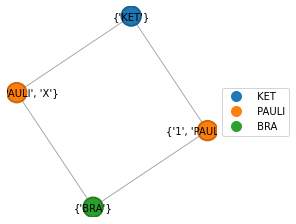

In [15]:
TN.graph(color=['KET', 'PAULI', 'BRA'], figsize=(4, 4))

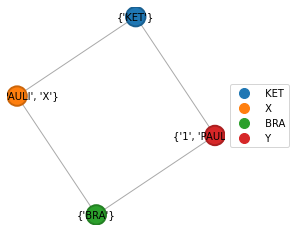

In [16]:
TN.graph(color=['KET', 'X', 'BRA', 'Y'], figsize=(4, 4))

## Contracting Tensors

In [17]:
TN ^ all

(-0.12957554295202828+0.3396768093965795j)

In [18]:
print(TN ^ 'PAULI')

TensorNetwork([
    Tensor(shape=(2, 2), inds=('k0', 'k1'), tags={'KET'}),
    Tensor(shape=(2, 2), inds=('b0', 'b1'), tags={'BRA'}),
    Tensor(shape=(2, 2, 2, 2), inds=('k0', 'b0', 'k1', 'b1'), tags={'1', '0', 'X', 'PAULI', 'Y'}),
])


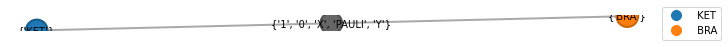

In [24]:
(TN ^ 'PAULI').graph(color=['KET', 'BRA'], figsize=(10, 20))

Cumulative contract.

In [26]:
print(TN >> ['KET', 'X', ('BRA', 'Y')])

(-0.12957554295202828+0.3396768093965795j)


In [27]:
TN ^ ...

(-0.12957554295202828+0.3396768093965795j)

## Splitting Tensors

Split tensor tagged 'KET' in TN.

In [31]:
Tk = TN['KET']

In [32]:
Tk

Tensor(shape=(2, 2), inds=('k0', 'k1'), tags={'KET'})

In [33]:
Tk_s = Tk.split(left_inds=['k0'])

In [34]:
print(Tk_s)

TensorNetwork([
    Tensor(shape=(2, 2), inds=('k0', '_703b52000000f'), tags={'KET'}),
    Tensor(shape=(2, 2), inds=('_703b52000000f', 'k1'), tags={'KET'}),
])


Replace tensor by split version.

In [35]:
del TN['KET']

In [36]:
TN &= Tk_s

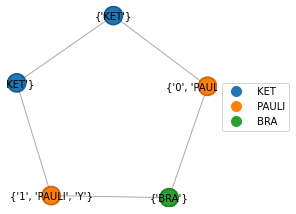

In [39]:
TN.graph(color=['KET', 'PAULI', 'BRA'], figsize=(4, 4))

## Graph Orientated Tensor Network Creation

Create periodic matrix product state with bond dimension 7.

In [53]:
L = 10

In [54]:
tensors = [qtn.Tensor() for _ in range(L)]

In [55]:
for i in range(L):
    tensors[i].new_ind(f'k{i}', size=2)
    tensors[i].new_bond(tensors[(i + 1) % L], size=7)

In [56]:
mps = qtn.TensorNetwork(tensors)

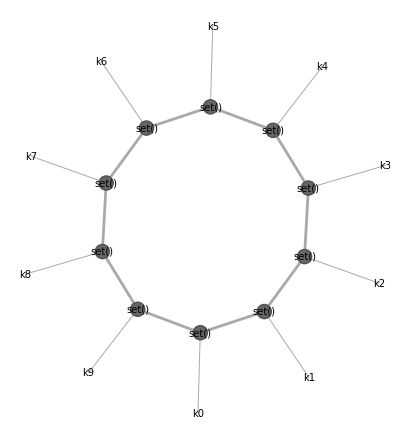

In [57]:
mps.graph()

In [58]:
tensors

[Tensor(shape=(7, 7, 2), inds=('_703b520000023', '_703b52000001A', 'k0'), tags=set()),
 Tensor(shape=(7, 2, 7), inds=('_703b52000001B', 'k1', '_703b52000001A'), tags=set()),
 Tensor(shape=(7, 2, 7), inds=('_703b52000001C', 'k2', '_703b52000001B'), tags=set()),
 Tensor(shape=(7, 2, 7), inds=('_703b52000001D', 'k3', '_703b52000001C'), tags=set()),
 Tensor(shape=(7, 2, 7), inds=('_703b52000001E', 'k4', '_703b52000001D'), tags=set()),
 Tensor(shape=(7, 2, 7), inds=('_703b52000001F', 'k5', '_703b52000001E'), tags=set()),
 Tensor(shape=(7, 2, 7), inds=('_703b520000020', 'k6', '_703b52000001F'), tags=set()),
 Tensor(shape=(7, 2, 7), inds=('_703b520000021', 'k7', '_703b520000020'), tags=set()),
 Tensor(shape=(7, 2, 7), inds=('_703b520000022', 'k8', '_703b520000021'), tags=set()),
 Tensor(shape=(7, 2, 7), inds=('_703b520000023', 'k9', '_703b520000022'), tags=set())]